<a href="https://colab.research.google.com/github/cherlhee/AI/blob/master/ex_ae_tf_chatgpt_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [71]:
# Download the dataset
# to clone data from github;
!git clone https://github.com/cherlhee/na_ai_daegu_univ.git

fatal: destination path 'na_ai_daegu_univ' already exists and is not an empty directory.


In [72]:
# to load dataset;
df = pd.read_csv('./na_ai_daegu_univ/aispark-dataset/train_data.csv')
df

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0
...,...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34,7
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20,7
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70,7
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71,7


In [73]:
numRows, numColumns = df.shape
print('num of rows;{}, num of columns;{}'.format(numRows, numColumns))

num of rows;2463, num of columns;8


In [74]:
raw_data = df.values
df.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [75]:
# train_data, test_data = train_test_split(raw_data, test_size=0.2, random_state=21)
train_data = raw_data

In [76]:
# to normalize data to [0,1];

# to find maximum and minimum value;
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

# to do normalization;
train_data = (train_data - min_val) / (max_val - min_val)
# test_data = (test_data - min_val) / (max_val - min_val)

# to transform data type to float32;
train_data = tf.cast(train_data, tf.float32)
# test_data = tf.cast(test_data, tf.float32)

In [77]:
normal_train_data = train_data
normal_train_data[0]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([4.4612796e-04, 1.1503928e-02, 1.9640852e-04, 5.7603815e-03,
       4.7138047e-01, 1.6461840e-02, 8.2210999e-04, 0.0000000e+00],
      dtype=float32)>

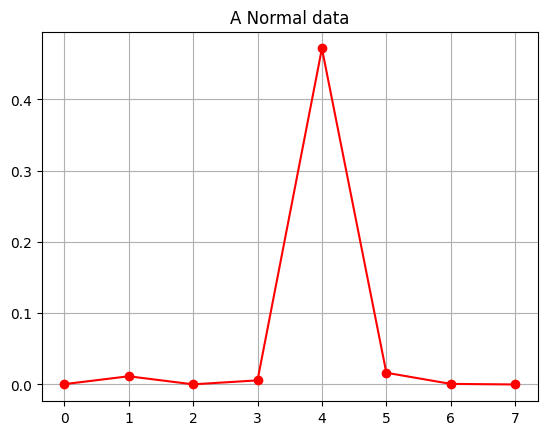

In [78]:
# to draw samples;

plt.grid()
plt.plot(np.arange(numColumns), normal_train_data[0], 'r-o')
plt.title("A Normal data")
plt.show()

In [79]:
df_test = pd.read_csv('./na_ai_daegu_univ/aispark-dataset/test_data.csv')
# df_test


test_data = df_test.values
print('test data;', test_data)

numRowsTest, numColumnsTest = df_test.shape
print('num of testdata rows;{}, num of testdata columns;{}'.format(numRowsTest, numColumnsTest))


test data; [[ 2.51 53.28  0.7  ... 69.58  3.48  0.  ]
 [ 2.66 55.24  0.7  ... 71.32  3.57  0.  ]
 [ 1.72 42.74  0.7  ... 60.21  3.01  0.  ]
 ...
 [ 1.56 40.61  0.7  ... 58.32  2.92  7.  ]
 [ 1.59 40.99  0.7  ... 58.66  2.93  7.  ]
 [ 1.7  42.51  0.7  ... 60.01  3.    7.  ]]
num of testdata rows;7389, num of testdata columns;8


In [80]:
# # to normalize data to [0,1];

# # to find maximum and minimum value;
min_val_test = tf.reduce_min(test_data)
max_val_test = tf.reduce_max(test_data)

# # to do normalization;
test_data = (test_data - min_val_test) / (max_val_test - min_val_test)

# # to transform data type to float32;
test_data = tf.cast(test_data, tf.float32)

test_data

<tf.Tensor: shape=(7389, 8), dtype=float32, numpy=
array([[0.00070426, 0.01494949, 0.00019641, ..., 0.01952301, 0.00097643,
        0.        ],
       [0.00074635, 0.01549944, 0.00019641, ..., 0.02001122, 0.00100168,
        0.        ],
       [0.0004826 , 0.01199214, 0.00019641, ..., 0.01689394, 0.00084456,
        0.        ],
       ...,
       [0.00043771, 0.0113945 , 0.00019641, ..., 0.01636364, 0.0008193 ,
        0.00196409],
       [0.00044613, 0.01150112, 0.00019641, ..., 0.01645903, 0.00082211,
        0.00196409],
       [0.00047699, 0.01192761, 0.00019641, ..., 0.01683782, 0.00084175,
        0.00196409]], dtype=float32)>

In [81]:
normal_test_data = test_data
normal_test_data[0]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([7.0426485e-04, 1.4949495e-02, 1.9640852e-04, 9.1301911e-03,
       7.4691355e-01, 1.9523008e-02, 9.7643095e-04, 0.0000000e+00],
      dtype=float32)>

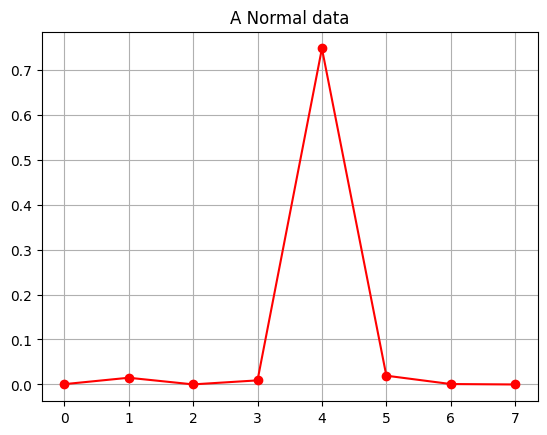

In [82]:

plt.grid()
plt.plot(np.arange(numColumns), normal_test_data[0], 'r-o')
plt.title("A Normal data")
plt.show()

In [83]:
# Define the autoencoder architecture

input_shape = (numColumns,)
encoding_dim = 6

inputs = tf.keras.Input(shape=input_shape)

encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(inputs)
decoded = tf.keras.layers.Dense(numColumns, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(inputs, decoded)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 8)                 56        
                                                                 
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [84]:



# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
# autoencoder.compile(optimizer=opt, loss='mse', metrics=['accuracy'])


In [85]:
# Train the model on normal data
# x_train = ... # load normal data
# autoencoder.fit(x_train, x_train, epochs=10, batch_size=256)
# train_data = ... # load normal data
ret = autoencoder.fit(train_data, train_data, epochs=40, batch_size=30)

Epoch 1/40
83/83 [==============================] - 2s 4ms/step - loss: 0.6565 - accuracy: 0.9618
Epoch 2/40
83/83 [==============================] - 0s 4ms/step - loss: 0.5521 - accuracy: 1.0000
Epoch 3/40
83/83 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 1.0000
Epoch 4/40
83/83 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 1.0000
Epoch 5/40
83/83 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 1.0000
Epoch 6/40
83/83 [==============================] - 0s 3ms/step - loss: 0.2095 - accuracy: 1.0000
Epoch 7/40
83/83 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 1.0000
Epoch 8/40
83/83 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 1.0000
Epoch 9/40
83/83 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 1.0000
Epoch 10/40
83/83 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 1.0000
Epoch 11/40
83/83 [

In [86]:
# autoencoder.evaluate(train_data, train_data)
autoencoder.evaluate(test_data, test_data)

231/231 [==============================] - 1s 3ms/step - loss: 0.0992 - accuracy: 1.0000


[0.09915948659181595, 1.0]

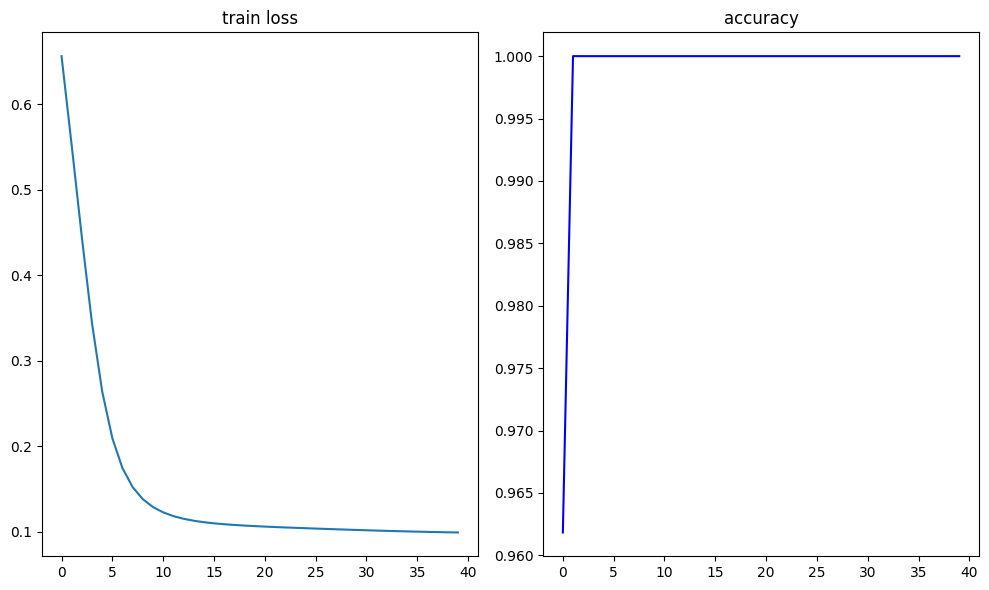

In [87]:


fig, ax = plt.subplots(1, 2, figsize=(10,6))

ax[0].plot(ret.history['loss'])
ax[0].set_title('train loss')

ax[1].plot(ret.history['accuracy'],'b-')
ax[1].set_title('accuracy')
fig.tight_layout()
plt.show()

In [88]:

# Evaluate the model on test data
# x_test = ... # load test data, including both normal and anomalous data

reconstructions = autoencoder.predict(test_data)
reconstructions

231/231 [==============================] - 1s 2ms/step


array([[0.00066844, 0.01112766, 0.0006995 , ..., 0.01527487, 0.00052915,
        0.00136071],
       [0.00054963, 0.01007713, 0.0005815 , ..., 0.0139311 , 0.00041958,
        0.001158  ],
       [0.00191065, 0.01891102, 0.00188538, ..., 0.02498081, 0.00183791,
        0.00323298],
       ...,
       [0.00234678, 0.02095515, 0.00228817, ..., 0.02747503, 0.00234662,
        0.00382876],
       [0.00226075, 0.02056563, 0.0022089 , ..., 0.02700175, 0.002245  ,
        0.00371279],
       [0.00194227, 0.01905411, 0.00191389, ..., 0.02515811, 0.00187519,
        0.00327632]], dtype=float32)

In [89]:

mse = tf.keras.losses.mean_squared_error(test_data, reconstructions)

threshold = tf.reduce_mean(mse) + tf.math.reduce_std(mse)
print('threshold;{}'.format(threshold))

threshold;0.0006198700866661966


In [90]:


is_anomalous = tf.greater(mse, threshold)

# Print the indices of anomalous samples
anomalous_indices = tf.where(is_anomalous)

# print("Anomalous indices:", anomalous_indices)
print('number of anomalous detection;', len(anomalous_indices))


number of anomalous detection; 972


In [91]:
autoencoder.save_weights('my_model_weights.h5')